<a href="https://colab.research.google.com/github/arellana/Tesis/blob/main/Clusterizacion/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [ ]:
cargar = '/content/drive/MyDrive/Tesis de Javi/DatosSimu/HU2-N=50-S=10000.txt'#/Iteracion/DU1-it2.txt'
dat = np.loadtxt(cargar, delimiter=';')


In [ ]:
l2 = dat[6]
l1 = dat[4]
x = np.stack((l2,l1),axis=-1)

In [ ]:
#sns.kdeplot(ep2,d, fill=True)

In [ ]:
#aux = np.stack((d,ep2),axis=-1)
#y_pred = KMeans(n_clusters=5).fit_predict(aux)

In [ ]:
plt.scatter(d, ep2, c=y_pred)

In [ ]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 16,
        'color': '#474863'
        }

In [ ]:
#En teoria se puede ver con esto el valor de cluster minimos que se necesita para que tenga sentido
#viendo en donde se vuelve "plano"

wcss=[]
#n_init: el numero de veces que re asigna los centroides de cada cluster
#n_cluster=numero de clusters
#max_iter: numero de iteraciones para convergencia.
for i in range(1,11):
    algoritmo=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    algoritmo.fit(x)
    wcss.append(algoritmo.inertia_)

In [ ]:
sns.set(style="darkgrid")
size = (16, 10)
fig, ax = plt.subplots(figsize=size)

sns.lineplot(ax=ax,x=range(1,11),y=wcss,marker="o",color='#990000')

plt.title('Analisis de numero de Clusters', fontdict=font)
plt.ylabel('WCSS', fontdict=font)
plt.xlabel('# de Cluster', fontdict=font)
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
#fit_predict, para que nos diga a que cluster pertenece cada observacion
y_kmeans=kmeans.fit_predict(x)

In [ ]:
#Contruimos un dataframe con las variables de interes
df_cluster = pd.DataFrame({'l2':x[:,0],'l1':x[:,1],'cluster':y_kmeans})

#Funcion auxiliar para cambiar los resultados de entero a string
def change_label(x):
    if x==0:
        return 'Segmento 1'
    elif x==1:
        return 'Segmento 2'
    elif x==2:
        return 'Segmento 3'
    
#Aplicamos notacion lambda para poder usar la funcion auxiliar a nivel registro en nuestro dataframe
df_cluster['cluster'] = df_cluster['cluster'].apply(lambda x: change_label(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


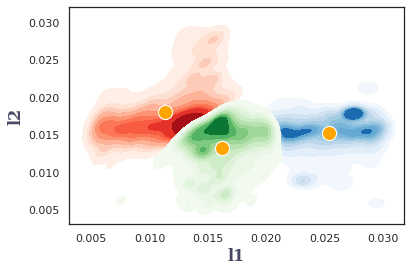

In [ ]:
sns.set(style="white")

#Filtramos nuestro dataframe por segmento
Segmento_1 = df_cluster.query("cluster == 'Segmento 1'")
Segmento_2 = df_cluster.query("cluster == 'Segmento 2'")
Segmento_3 = df_cluster.query("cluster == 'Segmento 3'")

# especificamos tamaños
f, ax = plt.subplots()
#ax.set_aspect("equal")

# Creamos cada grafica de contorno
ax = sns.kdeplot(x=Segmento_1.l2, y=Segmento_1.l1,
                 cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(x=Segmento_2.l2, y=Segmento_2.l1,
                 cmap="Blues", shade=True, shade_lowest=False)
ax = sns.kdeplot(x=Segmento_3.l2, y=Segmento_3.l1,
                 cmap="Greens", shade=True, shade_lowest=False)


ax= sns.scatterplot(kmeans.cluster_centers_[:,0],
                    kmeans.cluster_centers_[:,1],marker='o', color='orange',s=200)

plt.xlabel('l1' , fontdict=font)
plt.ylabel('l2' , fontdict=font)
#plt.xlim()

#Mostramos la grafica
plt.show()
#plt.savefig('cluster.png', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


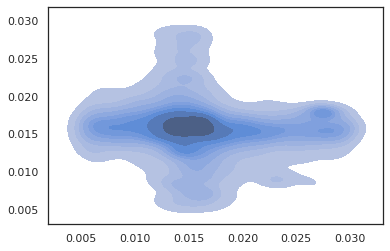

In [ ]:
sns.kdeplot(l2, l1,fill=True)